## Lab 5 - Convolutional Neural Network "from scratch"



In Lab 5 and Lab 6 you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps and fit neural networks for solving the binary classification task.

Task for Lab 5:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [0]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/My Drive/Cats_and_Dogs/train'

val =   '/content/drive/My Drive/Cats_and_Dogs/val'

test =  '/content/drive/My Drive/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# batch size
batch_size = 64
# train set size
nb_train_samples = 5000
# validation set size 
nb_validation_samples =625
# test set size
nb_test_samples = 625

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function for training deep neural networks _ImageGenerator_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


KeyboardInterrupt: ignored

In [0]:
# use generator for training the model ("fit" method analog)
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

NameError: ignored

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Operation model.add (Dropout (0.5)) - excludes a neuron from the current layer with a 50% probability to avoid overfitting. retraining.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [0]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 6:  +Pooling 

model.add(MaxPooling2D(pool_size=(2, 2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Convolutional
model.add(Dense(64 ))
#     +Relu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1,activation='sigmoid'))
#     +Sigmoid







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.

history1=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)




Epoch 1/10





 3/78 [>.............................] - ETA: 33:44 - loss: 0.7392 - acc: 0.4740

KeyboardInterrupt: ignored

In [0]:
scor=[]
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
scor.append(scores)
scores

NameError: ignored

In [0]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.

history2=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
25/25 [==============================] - 391s 16s/step - loss: 0.5736 - acc: 0.7219 - val_loss: 0.4700 - val_acc: 0.7955
Epoch 2/15
25/25 [==============================] - 372s 15s/step - loss: 0.5690 - acc: 0.7100 - val_loss: 0.5188 - val_acc: 0.7448
Epoch 3/15
25/25 [==============================] - 198s 8s/step - loss: 0.5702 - acc: 0.7119 - val_loss: 0.5818 - val_acc: 0.6979
Epoch 4/15
25/25 [==============================] - 43s 2s/step - loss: 0.5758 - acc: 0.7056 - val_loss: 0.5139 - val_acc: 0.7656
Epoch 5/15
25/25 [==============================] - 43s 2s/step - loss: 0.5483 - acc: 0.7319 - val_loss: 0.5123 - val_acc: 0.7656
Epoch 6/15
25/25 [==============================] - 43s 2s/step - loss: 0.5592 - acc: 0.7150 - val_loss: 0.5121 - val_acc: 0.7708
Epoch 7/15
25/25 [==============================] - 43s 2s/step - loss: 0.5328 - acc: 0.7306 - val_loss: 0.5265 - val_acc: 0.7552
Epoch 8/15
25/25 [==============================] - 41s 2s/step - loss: 0.5129 - acc:

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
scor.append(scores)
scores

Accuracy on test data: 77.60%


[0.48952676852544147, 0.7760416666666666]

In [0]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.

history3=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.4963 - acc: 0.7644 - val_loss: 0.4451 - val_acc: 0.7969
Epoch 2/20
25/25 [==============================] - 45s 2s/step - loss: 0.4852 - acc: 0.7744 - val_loss: 0.4858 - val_acc: 0.7604
Epoch 3/20
25/25 [==============================] - 44s 2s/step - loss: 0.4881 - acc: 0.7681 - val_loss: 0.4195 - val_acc: 0.8021
Epoch 4/20
25/25 [==============================] - 44s 2s/step - loss: 0.4684 - acc: 0.7812 - val_loss: 0.4872 - val_acc: 0.7500
Epoch 5/20
25/25 [==============================] - 45s 2s/step - loss: 0.4708 - acc: 0.7831 - val_loss: 0.5177 - val_acc: 0.7448
Epoch 6/20
25/25 [==============================] - 45s 2s/step - loss: 0.4968 - acc: 0.7606 - val_loss: 0.4772 - val_acc: 0.7917
Epoch 7/20
25/25 [==============================] - 45s 2s/step - loss: 0.4611 - acc: 0.7838 - val_loss: 0.4535 - val_acc: 0.7865
Epoch 8/20
25/25 [==============================] - 46s 2s/step - loss: 0.4570 - acc: 0.78

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
scor.append(scores)
scores
print()
scor

Accuracy on test data: 83.33%



[[0.5506023565928141, 0.7239583333333334],
 [0.48952676852544147, 0.7760416666666666],
 [0.3774598737557729, 0.8333333333333334]]

![alt text](Deeper.jpeg )

Plot the graphs: 

Loss(Number of epochs)

Accuracy(Number of epochs)

In [0]:
test3=[[0.5506023565928141, 0.7239583333333334],
 [0.48952676852544147, 0.7760416666666666],
 [0.3774598737557729, 0.8333333333333334]]

loss3=[]#test3
acc3=[]

test3[0][1]
acc3.append(test3[0][1]*100)
acc3.append(test3[1][1]*100)
acc3.append(test3[2][1]*100)

#acc3
loss3.append(test3[0][0]*100)
loss3.append(test3[1][0]*100)
loss3.append(test3[2][0]*100)
loss3
epochs3=[10, 15, 20]
epochs3

[10, 15, 20]

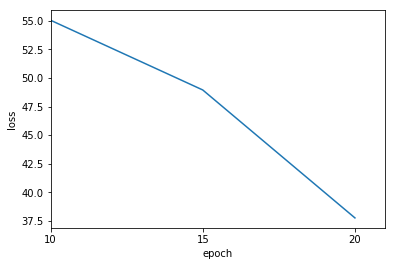

In [0]:
from matplotlib import pyplot as plt
import numpy as np
# summarize history for loss
plt.plot(epochs3, loss3)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([10, 21])
#plt.ylim([10, 0])
plt.xticks(np.arange(10, 21, 5))
#x = np.linspace(5, 5, 20)
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

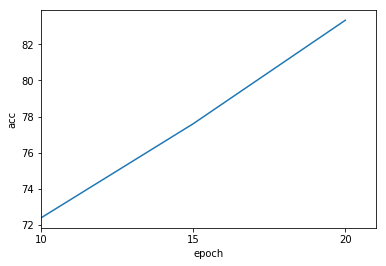

In [0]:
plt.plot(epochs3, acc3)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.xlim([10, 21])
#plt.ylim([10, 0])
plt.xticks(np.arange(10, 21, 5))
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

##  Lab 6 - Transfer Learning 

Let's try to improve the quality of recognition, using the method of transfer lerning - "transfer training." 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

Task for Lab 6:

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with another avaliable pre-trained deep learning model from keras application.
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to)

In [0]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____

  We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [0]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + dense connected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + full layer with 1 neuron
model.add(Dense(1,activation='sigmoid'))
# + sigmoid

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Tr

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


![alt text](VGG16.png )

and it becomes:

![alt text](VGG162.png )

In [0]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history4=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


ZeroDivisionError: ignored

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 78.12%


In [0]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [0]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/My Drive/Cats_and_Dogs/train'

val =   '/content/drive/My Drive/Cats_and_Dogs/val'

test =  '/content/drive/My Drive/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 160, 160, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# batch size
batch_size = 64
# train set size
nb_train_samples = 5000
# validation set size 
nb_validation_samples =625
# test set size
nb_test_samples = 625

In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# use generator for training the model ("fit" method analog)
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history4=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(160, 160,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
__________

In [0]:

model = Sequential()
model.add(base_model)

# + flattening
model.add(Flatten())
# + dense connected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + full layer with 1 neuron
model.add(Dense(1,activation='sigmoid'))
# + sigmoid

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_160 (Model)   (None, 5, 5, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6553856   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 9,782,977
Tra

In [0]:
 model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])



In [0]:

history5=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
78/78 [==============================] - 1645s 21s/step - loss: 0.4693 - acc: 0.8241 - val_loss: 0.1495 - val_acc: 0.9375
Epoch 2/5
78/78 [==============================] - 1739s 22s/step - loss: 0.2024 - acc: 0.9211 - val_loss: 0.0988 - val_acc: 0.9566
Epoch 3/5
78/78 [==============================] - 1734s 22s/step - loss: 0.1564 - acc: 0.9425 - val_loss: 0.0990 - val_acc: 0.9601
Epoch 4/5
78/78 [==============================] - 1619s 21s/step - loss: 0.1531 - acc: 0.9429 - val_loss: 0.0795 - val_acc: 0.9670
Epoch 5/5
78/78 [==============================] - 26s 330ms/step - loss: 0.1268 - acc: 0.9495 - val_loss: 0.0561 - val_acc: 0.9787




x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 95.66%


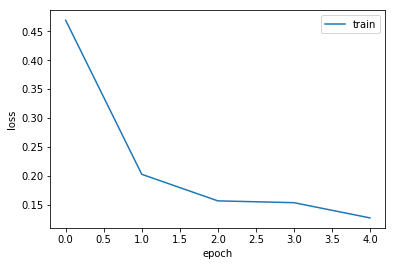

In [0]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.plot(history5.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

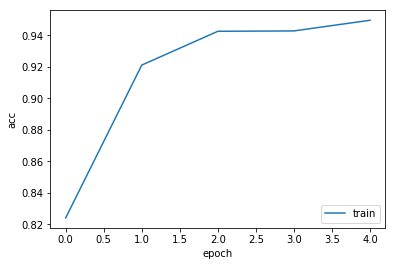

In [0]:
# summarize history for acc
plt.plot(history5.history['acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

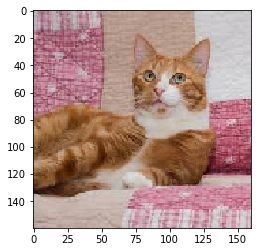

In [0]:
from PIL import Image
import os
from scipy import ndimage, misc

image = Image.open("/content/drive/My Drive/cat.jpg")
plt.imshow(image)



width = 160
height = 160
# use one of these filter options to resize the image
im2 = image.resize((width, height), Image.NEAREST)      # use nearest neighbour
#im5 = im1.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
ext = ".jpg"
im2.save("NEAREST" + ext)
#im5.save("ANTIALIAS" + ext)

plt.imshow(im2)

In [0]:
from keras.models import load_model
import cv2
import numpy as np
model.save('model.h5')
model1 = load_model('model.h5')

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
#img = cv2.imread("/content/drive/My Drive/Poodle01.jpg")
img = im2
img = np.reshape(img,[1,160,160,3])

classes = model1.predict_classes(img)

print(classes)

[[0]]


In [0]:
class22 = train_generator.class_indices  
print(class22)


{'cats': 0, 'dogs': 1}


In [0]:
print("our picture is cat")

our picture is cat
